In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
%matplotlib inline

In [3]:
file_path='/kaggle/input/housedata/data.csv'
df=pd.read_csv(file_path)

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.shape

(4600, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [7]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.corrwith(df['price']).abs().sort_values(ascending=False)

price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_renovated     0.028774
yr_built         0.021857
dtype: float64

In [10]:
df['date']=pd.to_datetime(df['date'])

In [11]:
df['city'].value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

In [12]:
df['statezip'].value_counts()

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

In [13]:
def histPlot(df,column):
    '''
    input  DataFrame, column
    output Histogram plot
    '''
    
    plt.figure()
    sns.histplot(df[column],kde=True)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Data Frequency - {column}")
    plt.show()

In [14]:
num_val=[]
cat_val=[]

for col in df.columns:
    if df[col].dtypes=='object':
        cat_val.append(col)
    else:
        num_val.append(col)

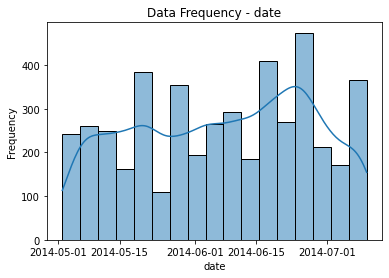

None


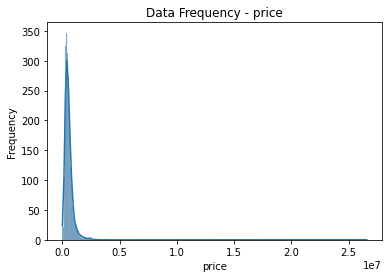

None


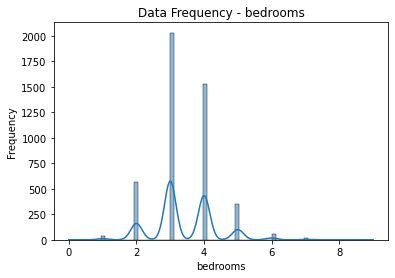

None


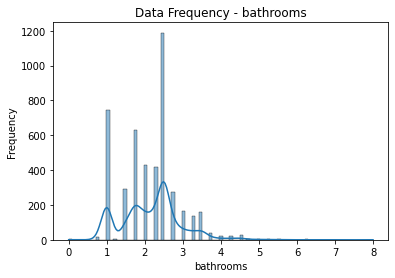

None


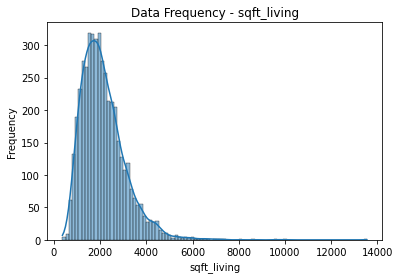

None


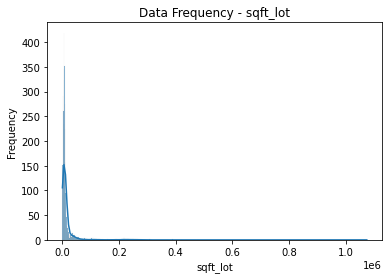

None


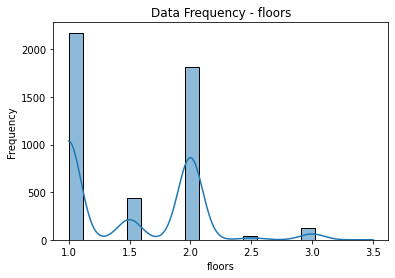

None


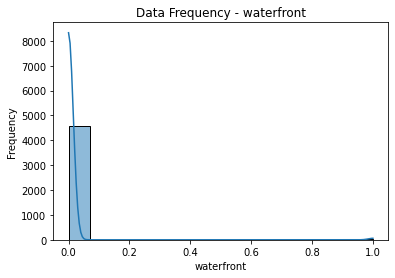

None


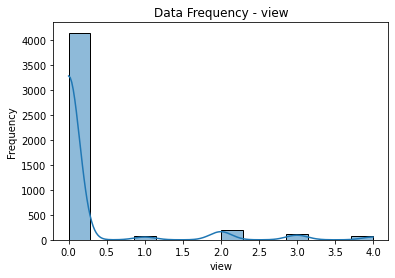

None


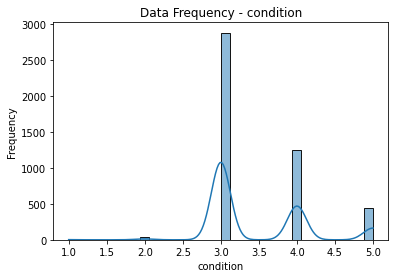

None


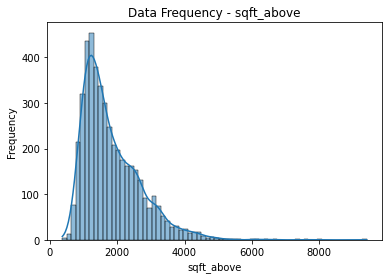

None


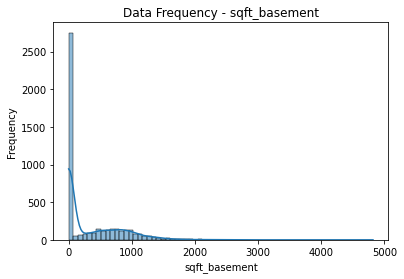

None


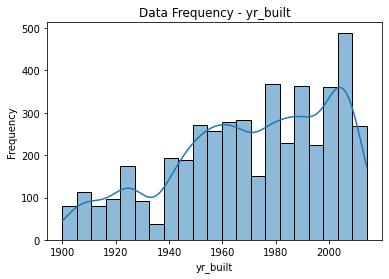

None


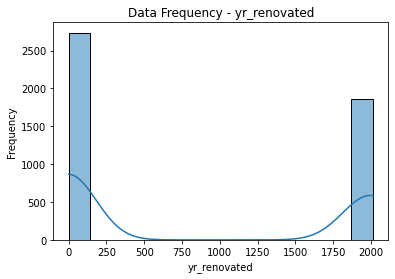

None


In [15]:
for i in num_val:
    print(histPlot(df,i))

In [16]:
def removeOutliers(df, columns):
    outlier_indices = []
    
    for c in columns:
        # first quartile
        Q1 = np.percentile(df[c],25)
        # third quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # multiplier for outlier detection
        outlier_step = IQR * 1.5
        # detect outlier and outlier index
        idx = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        df.drop(idx,axis=0,inplace=True)
        
  
    
removeOutliers(df,num_val)    

In [17]:
num_val[9]

'condition'

<AxesSubplot:xlabel='floors', ylabel='price'>

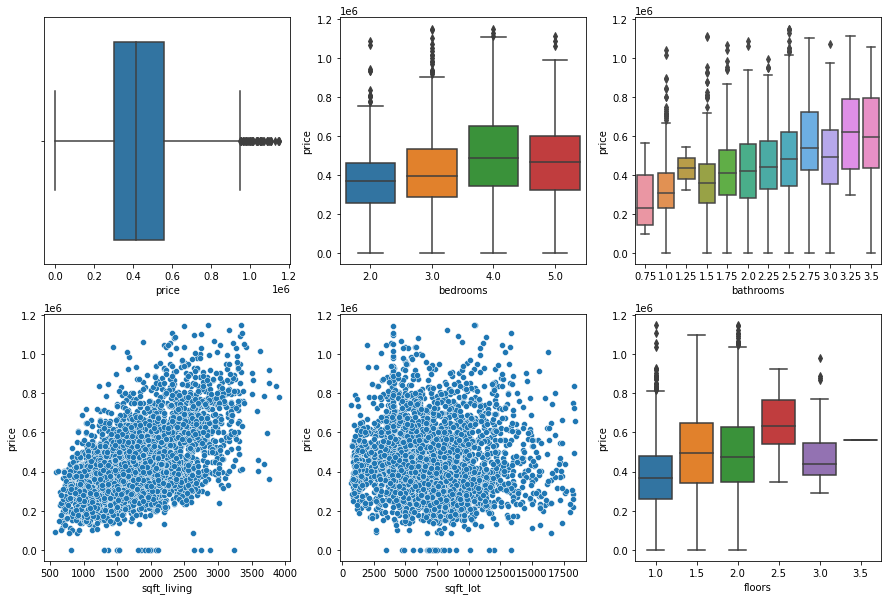

In [18]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))

sns.boxplot(data=df,x='price',ax=ax[0,0])
sns.boxplot(data=df,x='bedrooms',y='price',ax=ax[0,1])
sns.boxplot(data=df,x='bathrooms',y='price',ax=ax[0,2])
sns.scatterplot(data=df,x='sqft_living',y='price',ax=ax[1,0])
sns.scatterplot(data=df,x='sqft_lot',y='price',ax=ax[1,1])
sns.boxplot(data=df,x='floors',y='price',ax=ax[1,2])





In [19]:
df.corrwith(df['price']).sort_values(ascending=False)

price            1.000000
sqft_living      0.542249
sqft_above       0.443587
bathrooms        0.380710
floors           0.261108
bedrooms         0.224354
sqft_basement    0.178790
condition        0.070595
yr_built        -0.007865
sqft_lot        -0.062454
yr_renovated    -0.082547
waterfront            NaN
view                  NaN
dtype: float64

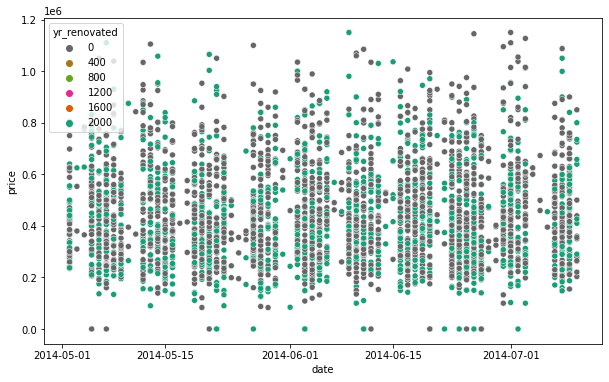

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='date',y='price',hue='yr_renovated',palette='Dark2_r')
plt.show()

In [21]:
df['price']=df['price'].round(2)

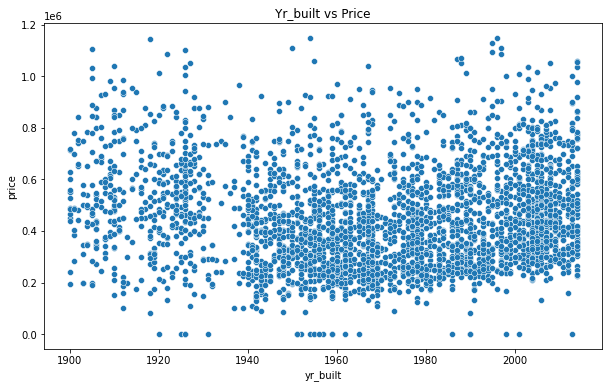

In [22]:
plt.figure(figsize=(10,6))
plt.title("Yr_built vs Price")
sns.scatterplot(data=df,x='yr_built',y='price')
plt.show()


In [23]:
idx=df[df['price']==0].index
df.drop(idx,axis=0,inplace=True)

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor ,AdaBoostRegressor,RandomForestRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score ,mean_absolute_error, mean_squared_error

In [25]:
labels=['date','waterfront','view','street','statezip','country']
df.drop(labels=labels,axis=1,inplace=True)

In [26]:
encoder=LabelEncoder()
df['city']=encoder.fit_transform(df['city'])

In [27]:
df.corrwith(df['price']).sort_values(ascending=False)

price            1.000000
sqft_living      0.555179
sqft_above       0.453381
bathrooms        0.389926
floors           0.262205
bedrooms         0.242824
sqft_basement    0.185226
city             0.138493
condition        0.080047
yr_built        -0.013289
sqft_lot        -0.060659
yr_renovated    -0.084259
dtype: float64

In [30]:
X=df.columns[1:]
y=df.columns[0]

X=df[X]
y=df[y]

In [33]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [150]:
getMetrics(ExtraTreesRegressor())

	ExtraTreesRegressor()
 MAE: 86305.48482518969
 RMSE: 113543.09735005374
 r2_score: 0.6127957032760993


In [159]:
def getMetrics(models):
    df_metrics=pd.DataFrame(columns=['Model','MAE','RMSE','R2_score'])
    for model in models:
        model.fit(X_train,y_train)
        y_predict=model.predict(X_test)

        mae=mean_absolute_error(y_test,y_predict)
        rmse=np.sqrt(mean_squared_error(y_test,y_predict))
        r2=r2_score(y_test,y_predict)
        df_metrics=df_metrics.append({'Model':str(model),'MAE':mae,'RMSE':rmse,'R2_score':r2},ignore_index=True)
    return df_metrics

In [163]:
models=[Ridge(),RandomForestRegressor(),ExtraTreesRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor(),CatBoostRegressor(),LinearRegression()]
results=getMetrics(models)

Learning rate set to 0.047716
0:	learn: 188506.9709174	total: 1.65ms	remaining: 1.65s
1:	learn: 185486.1428968	total: 3.13ms	remaining: 1.56s
2:	learn: 182859.2546274	total: 4.63ms	remaining: 1.54s
3:	learn: 180151.2681748	total: 6.07ms	remaining: 1.51s
4:	learn: 177534.1174227	total: 7.55ms	remaining: 1.5s
5:	learn: 175049.4201469	total: 9.24ms	remaining: 1.53s
6:	learn: 173021.5670545	total: 10.6ms	remaining: 1.51s
7:	learn: 170244.7810388	total: 12ms	remaining: 1.49s
8:	learn: 168346.5161335	total: 13.7ms	remaining: 1.5s
9:	learn: 165927.8996481	total: 15.2ms	remaining: 1.5s
10:	learn: 164265.1079781	total: 16.7ms	remaining: 1.5s
11:	learn: 162684.2572992	total: 18.1ms	remaining: 1.49s
12:	learn: 161313.4672182	total: 19.9ms	remaining: 1.51s
13:	learn: 159895.2571928	total: 21.4ms	remaining: 1.51s
14:	learn: 158090.1121567	total: 23ms	remaining: 1.51s
15:	learn: 156741.5003826	total: 24.6ms	remaining: 1.51s
16:	learn: 155069.1853498	total: 26.1ms	remaining: 1.51s
17:	learn: 153476.4

In [176]:
reults['Model'][6]='XGBRegressor'
reults['Model'][7]='CatBoostRegressor'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


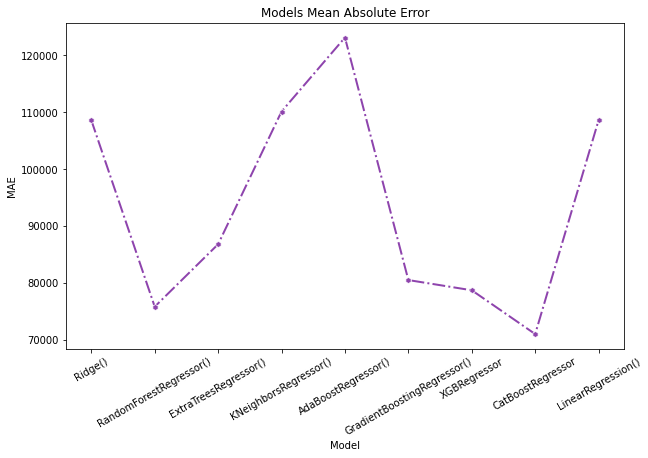

In [205]:
plt.figure(figsize=(10,6))
plt.title("Models Mean Absolute Error")
sns.lineplot(data=reults,x='Model',y='MAE', linewidth=2,
         linestyle='-.',
         color='#8E44AD',
         alpha=1,
         marker='h')
plt.xticks(rotation=30)
plt.show()

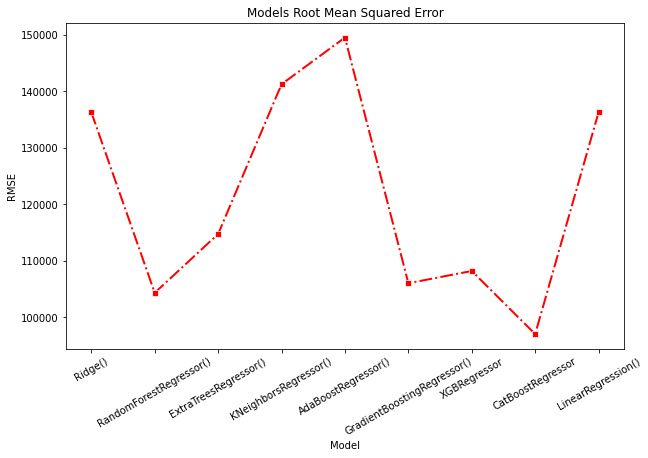

In [230]:
plt.figure(figsize=(10,6))
plt.title("Models Root Mean Squared Error")
sns.lineplot(data=reults,x='Model',y='RMSE', linewidth=2,
         linestyle='-.',
         color='red',
         alpha=1,
         marker='s')
plt.xticks(rotation=30)
plt.show()

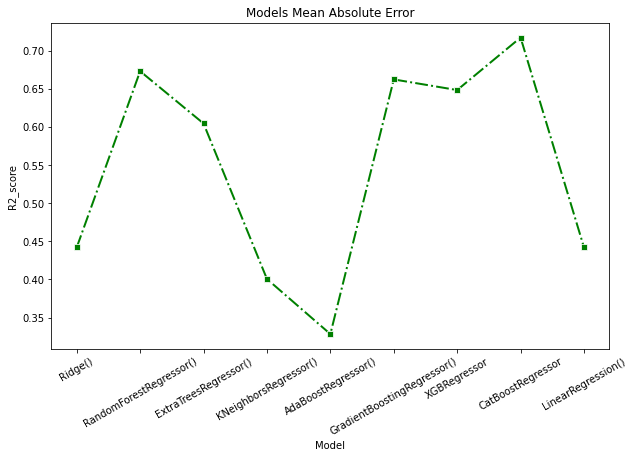

In [229]:
plt.figure(figsize=(10,6))
plt.title("Models R2_score")
sns.lineplot(data=reults,x='Model',y='R2_score', linewidth=2,
         linestyle='-.',
         color='green',
         alpha=1,
         marker='s')
plt.xticks(rotation=30)
plt.show()

#  Top 3 Models
1. CatBoostRegressor
2. RandoomForestRegressor
3. GradientBoostingRegressor

In [233]:
model=CatBoostRegressor(iterations=500,random_seed=0)
model.fit(X_train,y_train)
predict=model.predict(X_test)
print(mean_absolute_error(y_test,predict))

Learning rate set to 0.08383
0:	learn: 186185.1492074	total: 2.67ms	remaining: 1.33s
1:	learn: 181626.8970844	total: 4.19ms	remaining: 1.04s
2:	learn: 177491.5035368	total: 5.82ms	remaining: 964ms
3:	learn: 173425.2174801	total: 7.45ms	remaining: 924ms
4:	learn: 169202.9030608	total: 9.03ms	remaining: 894ms
5:	learn: 165238.8250536	total: 10.4ms	remaining: 860ms
6:	learn: 162521.2294217	total: 12ms	remaining: 843ms
7:	learn: 158732.7393201	total: 13.6ms	remaining: 838ms
8:	learn: 155911.4610706	total: 15.2ms	remaining: 828ms
9:	learn: 152824.6285993	total: 16.6ms	remaining: 813ms
10:	learn: 150950.7260372	total: 18ms	remaining: 801ms
11:	learn: 148316.3987850	total: 19.5ms	remaining: 792ms
12:	learn: 146813.1266140	total: 21ms	remaining: 787ms
13:	learn: 145330.1853900	total: 22.5ms	remaining: 781ms
14:	learn: 143138.3720835	total: 24ms	remaining: 775ms
15:	learn: 141583.6662875	total: 25.3ms	remaining: 766ms
16:	learn: 140217.7894800	total: 26.6ms	remaining: 755ms
17:	learn: 138283.07

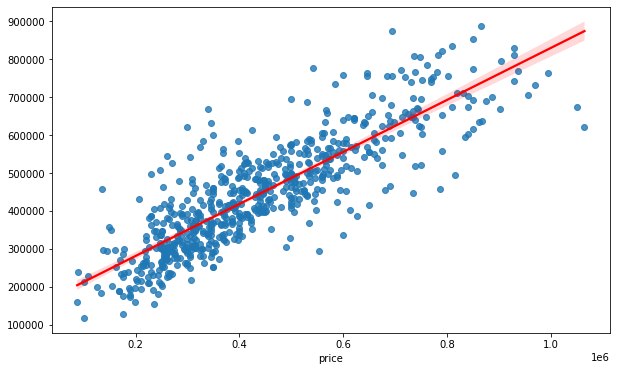

In [240]:
plt.figure(figsize=(10,6))
sns.regplot(x=y_test,y=predict,line_kws={'color':'red'})
plt.show()